<a href="https://colab.research.google.com/github/mperricone24/Week3_Text_Analysis/blob/main/Session3_nltk_worksheet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 📝 Python for Public Policy — Session 3 Worksheet  
**Theme:** Text Analysis with NLTK (Inaugural Speeches or Your Own `.txt`)

Use this notebook during the 60‑minute student-driven block. **No presentations** at the end.  
You may analyze an NLTK inaugural speech **or** upload your own plain text file (`.txt`).

**Timing guide:**  
- Part A: 10 min · Part B: 10 min · Part C: 10 min · Part D: 10 min · Part E: 10 min · Part F: 10 min



## Part 0 — Setup (run once)
Upgrade NLTK (Colab often pins an older version) and download the datasets we need.


In [46]:

# We upgrade NLTK to the latest version so functions and data work as expected.
!pip -q install -U nltk

# Now we import nltk and download only the small packages we need for this session.
import nltk
needed = ["punkt_tab",           # tokenizer (splits text into words)
          "stopwords",       # list of common words to remove (the, and, is, ...)
          "wordnet",         # lexical database used for lemmatization (getting word roots)
          "averaged_perceptron_tagger_eng",  # part-of-speech tagger (N/V/Adj/Adv)
          "inaugural"]       # a small corpus of U.S. inaugural addresses
for pkg in needed:
    nltk.download(pkg, quiet=True) # no status text printed - just downloads

print("NLTK version:", nltk.__version__)


NLTK version: 3.9.1


In [47]:
!pip -q install -U nltk

import nltk
needed = ["punkt_tab",
          "stopwords",
          "wordnet",
          "averaged_perceptron_tagger_eng", # Fixed typo here
          "inaugural"]
for pkg in needed:
    nltk.download(pkg, quiet=True)

print("NLTK version:", nltk.__version__)

NLTK version: 3.9.1



## Part A — Pick Your Text (10 min)
Choose **one** source below.

### Option 1 — Use the built-in Inaugural Speeches corpus


In [48]:

from nltk.corpus import inaugural
fileids = inaugural.fileids()
fileids[:10]  # preview a few
# Choose one speech (change the index or pick a specific filename from 'fileids')
s1 = fileids[-5]
raw = inaugural.raw(s1)
print("Analyzing:", s1, "| characters:", len(raw))


Analyzing: 2009-Obama.txt | characters: 13439



### Option 2 — Upload your own `.txt`
> Must be **plain text** (e.g., speech, policy memo, report). If you upload multiple files, we’ll read the first one.


If you don’t already have a `.txt` file (like the inaugural corpus examples), you can **make one directly in Colab**.  
This is helpful if you want to analyze text copied from a website, a PDF, or your own writing.

📝 Example: paste any text (such as a news article, policy speech, or blog post) into the triple quotes below.

In [49]:

# Create a plain-text file in Colab
text = """To the sons of the proud Syrian people, I stand before you today with a heart full of hope and determination, addressing my words to all Syrian men and women, to those living in displacement camps, to the displaced and refugees, to the wounded and injured, to the families of the martyrs and the missing, to the revolutionary activists who have dedicated their lives to the struggle for a free Syria.”
“I stand before you today after fifty-four days of our liberation, the liberation of Syria from the shackles of a criminal regime that has oppressed us for decades. Fifty-four days have passed since the end of fifty-four years of the darkest forms of tyrannical rule in the history of Syria and the entire world.”
“Syria was liberated thanks to God first, and then thanks to every person who struggled at home and abroad, every person who sacrificed his soul and blood, his home and money, his security and safety.”
“Syria was liberated with the martyrs, the detainees, the tortured, the missing, and all their bereaved mothers and grieving families. Because of their sacrifices and the sacrifices of all of you, I stand here today to open together a new chapter in the history of our beloved country.”
“This victory was launched from the throats of the demonstrators and the chants of the protesters in the squares and fields. It was launched from the fingers of Hamza al-Khatib and the chants of the demonstrations, and the groans of the detainees and tortured in the basements of Tadmur, Sednaya, and the Palestine Branch. It continued with the sacrifices of the revolutionaries who liberated the land of Syria, despite years of suffering from missiles, barrels, and chemical weapons. They did not bend or break.”
“Brothers and sisters, I assumed responsibility for the country yesterday, after intensive consultations with legal experts to ensure the political process proceeds within legal norms and in a way that gives it the necessary legitimacy.”
“From here, I address you today in my capacity as President of Syria in this fateful period, asking God to grant us all success in advancing our country and overcoming the challenges we face. This will not happen except through the solidarity of everyone, people and leadership.”
“I speak to you today not as a ruler, but as a servant of our wounded homeland, striving with all my strength and will to achieve Syria’s unity and renaissance, all of us bearing in mind that this is a transitional phase, and it is part of a political process that requires the real participation of all Syrian men and women, at home and abroad, to build their future in freedom and dignity, without exclusion or marginalization.”
“We will work to form a comprehensive transitional government that expresses the diversity of Syria, its men, women, and youth, and that will undertake the work of building the institutions of the new Syria until we reach the stage of free and fair elections.”
“Based on my mandate for my current duties and the decision to dissolve the People’s Assembly, I will announce a preparatory committee to select a small legislative council to fill this void in the transitional phase.”
“We will announce in the coming days the preparatory committee for the National Dialogue Conference, which will be a direct platform for deliberations, consultations and listening to various points of view on our upcoming political program.”
“After completing these steps, we will announce the constitutional declaration to be the legal reference for the transitional phase.”
“In the coming period, we will focus on setting our priorities within the following:
Achieving civil peace and pursuing the criminals who shed Syrian blood and committed massacres and crimes against us, whether they hid inside the country or fled abroad, through true transitional justice.
Completing the unity of Syrian lands; all of Syria, and imposing its sovereignty under one authority and on one land.
Building strong state institutions based on efficiency and justice, free of corruption, favoritism, and bribery.
Establishing the foundations of a strong economy that restores Syria’s regional and international standing, provides real, decent job opportunities, improves living conditions, and restores lost basic services.”
“O sons of free Syria, building the homeland is our collective responsibility, and this is an invitation to all Syrians to participate in building a new homeland, ruled by justice and consultation”
“Together, we will build the Syria of the future, the Syria of the beacon of knowledge and progress, and the haven of security and stability, the Syria of prosperity, progress and flourishing, the Syria that extends its hand with peace and respect, so that its people may return to a dear, generous, prosperous, safe, and secure homeland, God willing.”

"""

# Write the text into a .txt file
with open("mytext.txt", "w", encoding="utf-8") as f:
    f.write(text)

print("✅ Saved mytext.txt")

# Load your saved .txt file
with open("mytext.txt", encoding="utf-8") as f:
    raw = f.read()

print(raw[:500])  # print first 500 characters



✅ Saved mytext.txt
To the sons of the proud Syrian people, I stand before you today with a heart full of hope and determination, addressing my words to all Syrian men and women, to those living in displacement camps, to the displaced and refugees, to the wounded and injured, to the families of the martyrs and the missing, to the revolutionary activists who have dedicated their lives to the struggle for a free Syria.”
“I stand before you today after fifty-four days of our liberation, the liberation of Syria from th



**Q:** Which text did you choose and why? *(Write a 1–2 sentence note below.)*


In [50]:

# Your short reflection:
choice_note = """
(I have an interest in Middle East dynamics and as Syria's new leader has an "interesting" past, I am curious what he states are his priorities as he address the leaders of the world at the UNGA.)
"""
print(choice_note)



(I have an interest in Middle East dynamics and as Syria's new leader has an "interesting" past, I am curious what he states are his priorities as he address the leaders of the world at the UNGA.)




## Part B — Tokenize & Explore (10 min)
Lowercase and keep only alphabetic tokens (drop punctuation/numbers) for a quick clean view.


In [51]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Define the set of English stopwords
stop_words = set(stopwords.words('english'))

# Tokenize: split into tokens, lowercase them, keep alphabetic tokens only, and remove stop words
tokens = [w.lower() for w in word_tokenize(raw) if w.isalpha() and w.lower() not in stop_words]
len(tokens), tokens[:20]

(386,
 ['sons',
  'proud',
  'syrian',
  'people',
  'stand',
  'today',
  'heart',
  'full',
  'hope',
  'determination',
  'addressing',
  'words',
  'syrian',
  'men',
  'women',
  'living',
  'displacement',
  'camps',
  'displaced',
  'refugees'])


**Questions:**  
1) How many tokens (words) are in your text?  There are 790 tokens in my text.
2) List 5 tokens you expected to see. Were they present? syrian, trust, i, fight, and rebuild



## Part C — Keyword in Context (10 min)
Use *concordance* to see your keywords in context.


In [52]:

from nltk.text import Text
T = Text(tokens)

# Try two policy keywords of interest (edit these):
T.concordance("stability", width=70, lines=12)
T.concordance("peace", width=70, lines=12)


Displaying 1 of 1 matches:
n knowledge progress security stability syria prosperity progress flo
Displaying 2 of 2 matches:
ithin following achieving civil peace pursuing criminals shed syrian 
 flourishing syria extends hand peace respect people may return dear 



**Prompt:** In 2–3 sentences, what do the surrounding words suggest about how these topics are framed?


In [53]:

analysis_notes = """
These topics are framed as Syria's path forward after more than a decade of Civil War. The country has been racked with civil strife, violence, and instability.
He also mentions seeking accountability those whose past transgressions hurt the people of Syria.
"""
print(analysis_notes)



These topics are framed as Syria's path forward after more than a decade of Civil War. The country has been racked with civil strife, violence, and instability.
He also mentions seeking accountability those whose past transgressions hurt the people of Syria.




## Part D — Dispersion Plot (10 min)
Where do topics appear (beginning/middle/end)? Replace terms with 3–5 of your own.


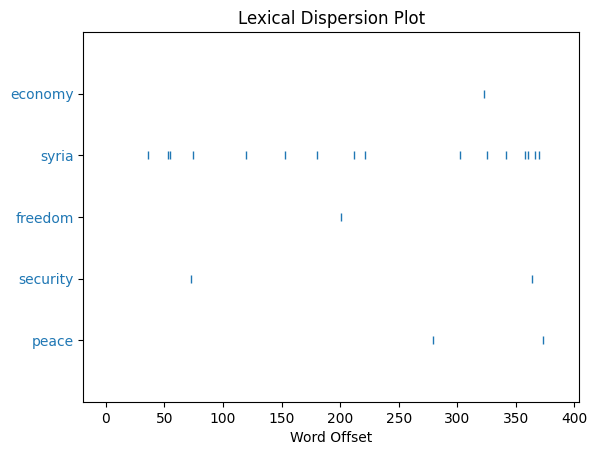

In [54]:

# NLTK's dispersion_plot uses matplotlib under the hood
T.dispersion_plot(["economy", "syria", "freedom", "security", "peace"])



**Prompt:** What patterns do you notice? Why might this matter for policy framing?


In [55]:

framing_notes = """
We a mention of security and peace more frequently than economy or freedom when he relates these words to Syria.
His message seems to focus on security and peace after the overthrow of Assad and the end of the Civil War.
"""
print(framing_notes)



We a mention of security and peace more frequently than economy or freedom when he relates these words to Syria. 
His message seems to focus on security and peace after the overthrow of Assad and the end of the Civil War.




## Part E — Lexical Diversity (10 min)
Lexical diversity = unique words / total words. Use a fixed slice for fair comparisons.


In [56]:

def lexical_diversity(tok_list, n=None):
    """Return unique/total; if n is provided, compute on first n tokens."""
    if n:
        tok_list = tok_list[:n]
    total = len(tok_list) if tok_list else 1
    return len(set(tok_list)) / total

div_all = lexical_diversity(tokens)
div_2k  = lexical_diversity(tokens, 2000)

print("Lexical diversity (all tokens):", round(div_all, 4))
print("Lexical diversity (first 2,000):", round(div_2k, 4))


Lexical diversity (all tokens): 0.7073
Lexical diversity (first 2,000): 0.7073



**Why it matters (policy analysis):** Differences in lexical diversity can reflect changes in audience targeting, technicality vs. accessibility, or agenda breadth (e.g., a narrow crisis speech vs. a broad programmatic agenda).  

*(Optional)* Compare with a second speech by repeating Part A for another `fileid` and recomputing diversity on the same slice size.



## Part F — Reflection (10 min)
- Which tool felt most useful for policy analysis (concordance, dispersion, lexical diversity)? Why?  
- How could you apply this to a real policy dataset (hearings, legislation, news, social media)?


In [57]:

final_reflection = """
I think the concordance tool was most useful in this example as it showed the context of the keywords I was looking for by
providing a portion of the sentence that the keywords were found. It provide me a better idea of how these words were used when compared to the dispersion
plot."""
print(final_reflection)



I think the concordance tool was most useful in this example as it showed the context of the keywords I was looking for by
providing a portion of the sentence that the keywords were found. It provide me a better idea of how these words were used when compared to the dispersion 
plot.



---
## 🚀 Stretch Challenges (Optional)

### 1) Collocations (common policy phrases)
Find frequently co-occurring word pairs (bigrams). These can reveal informative policy phrases (e.g., *national security*, *climate change*).


In [58]:

from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder

# Use a filtered token list (already lowercase & alphabetic)
finder = BigramCollocationFinder.from_words(tokens)
# Only consider reasonably frequent bigrams (adjust min_freq to taste)
finder.apply_freq_filter(3)
bigrams_pmi = finder.nbest(BigramAssocMeasures.pmi, 15)
bigrams_pmi


[('men', 'women'), ('stand', 'today')]


### 2) VADER sentiment on short snippets
Useful for very short statements (tweets, headlines). For long speeches, sentiment averages toward neutral.


In [59]:

# VADER is in nltk.sentiment
nltk.download('vader_lexicon', quiet=True)
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

samples = [
    "We will rebuild our economy and create jobs.",
    "War brings hardship and loss.",
    "Together we can protect our freedoms."
]

for s in samples:
    print(s, "->", sia.polarity_scores(s))


We will rebuild our economy and create jobs. -> {'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'compound': 0.2732}
War brings hardship and loss. -> {'neg': 0.81, 'neu': 0.19, 'pos': 0.0, 'compound': -0.8176}
Together we can protect our freedoms. -> {'neg': 0.0, 'neu': 0.455, 'pos': 0.545, 'compound': 0.5859}



### 3) Compare two texts (quick)
Repick another `fileid` and compute lexical diversity on the same slice (e.g., 2,000 tokens). What differences do you see?


In [60]:

# Example scaffold:
# s2 = fileids[-1]
# raw2 = inaugural.raw(s2)
# tokens2 = [w.lower() for w in word_tokenize(raw2) if w.isalpha()]
# print("A:", s1, "div(2k) =", round(lexical_diversity(tokens, 2000), 4))
# print("B:", s2, "div(2k) =", round(lexical_diversity(tokens2, 2000), 4))



### 4) Quick frequency table + matplotlib bar chart
Show top 15 tokens (after simple cleaning). *Keep charts simple and readable.*


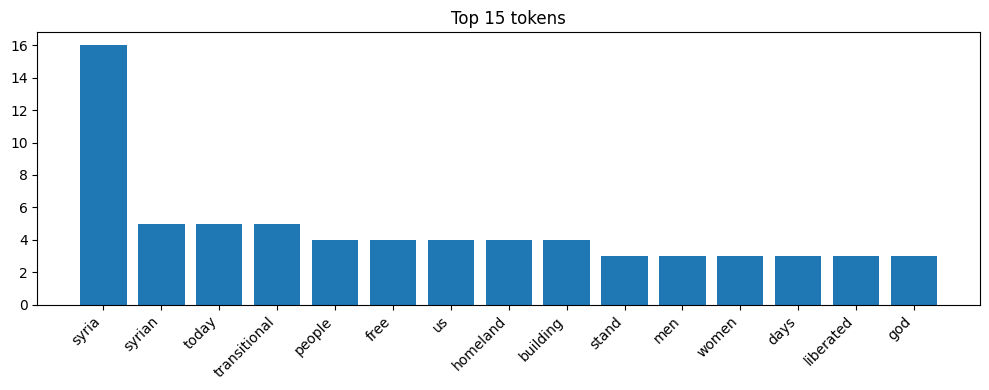

In [61]:

from nltk import FreqDist
import matplotlib.pyplot as plt

fd = FreqDist(tokens)
top = fd.most_common(15)

labels, counts = zip(*top)
plt.figure(figsize=(10,4))
plt.bar(range(len(labels)), counts)
plt.xticks(range(len(labels)), labels, rotation=45, ha='right')
plt.title("Top 15 tokens")
plt.tight_layout()
plt.show()
